<a href="https://colab.research.google.com/github/shivanidhar29/projects/blob/main/TMobileAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import requests
import pandas as pd
myAPIkey ='5e44a5083ea7ed6ecada7c23e9f37dbe'
stock = 'TMUS'

balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIkey}"
).json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIkey}'
).json()
print(balanceStatements[:5])

[{'date': '2021-12-31', 'symbol': 'TMUS', 'reportedCurrency': 'USD', 'cik': '0001283699', 'fillingDate': '2022-02-11', 'acceptedDate': '2022-02-11 16:09:17', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 6631000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 6631000000, 'netReceivables': 8942000000, 'inventory': 2567000000, 'otherCurrentAssets': 2751000000, 'totalCurrentAssets': 20891000000, 'propertyPlantEquipmentNet': 70084000000, 'goodwill': 12188000000, 'intangibleAssets': 97339000000, 'goodwillAndIntangibleAssets': 109527000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 6061000000, 'totalNonCurrentAssets': 185672000000, 'otherAssets': 0.0, 'totalAssets': 206563000000, 'accountPayables': 6499000000, 'shortTermDebt': 10168000000, 'taxPayables': 1830000000, 'deferredRevenue': 856000000, 'otherCurrentLiabilities': 5976000000, 'totalCurrentLiabilities': 23499000000, 'longTermDebt': 95843000000, 'deferredRevenueNonCurrent

In [27]:
twoYearBalanceStatement=balanceStatements[:5]
twoYearIncomeStatement=incomeStatements[:5]


In [29]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
year=[]
for i in range(0,5):
  profitabilityValue=twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)
  print(returnOnEquity)
  year.append(twoYearIncomeStatement[i]['calendarYear'])


[0.04376139619692628]
[0.04376139619692628, 0.046890303623898136]
[0.04376139619692628, 0.046890303623898136, 0.12046267671680157]
[0.04376139619692628, 0.046890303623898136, 0.12046267671680157, 0.11683793187151063]
[0.04376139619692628, 0.046890303623898136, 0.12046267671680157, 0.11683793187151063, 0.20107274258610755]


In [35]:
df=pd.DataFrame(columns=['calendarYear','profitability','assetTurnOver','capitalStructure','returnOnEquity'])
df['calendarYear']=year
df['profitability']=profitability
df['assetTurnOver']=assetTurnOver
df['capitalStructure']=capitalStructure
df['returnOnEquity']=returnOnEquity

print(df)

  calendarYear  profitability  assetTurnOver  capitalStructure  returnOnEquity
0         2021       0.037744       0.387862          2.989248        0.043761
1         2020       0.044797       0.341708          3.063204        0.046890
2         2019       0.077070       0.517688          3.019243        0.120463
3         2018       0.066682       0.597643          2.931791        0.116838
4         2017       0.111713       0.575429          3.127931        0.201073


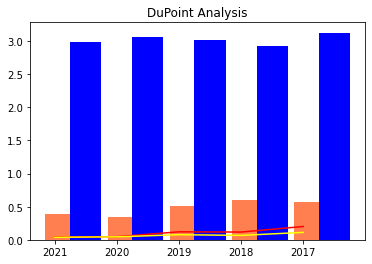

In [31]:
import numpy as np
import matplotlib.pyplot as plt
#Net Margin - Line Chart, Return on Equity - Line Chart, Asset Turnover (Sales/Total Assets) - Bar Chart, Leverage (Total Assets/Net Worth) - Bar Chart
xpos = np.arange(len(year))
plt.bar(xpos + 0.1, assetTurnOver, color = 'coral', width = 0.5)
plt.bar(xpos + 0.5, capitalStructure, color = 'blue', width = 0.5)
plt.plot(xpos, returnOnEquity, color = 'red')
plt.plot(xpos, profitability, color = 'yellow')
plt.xticks(xpos, year)
plt.title('DuPoint Analysis')
plt.show()

In [32]:
print(year)

print(assetTurnOver)
print(capitalStructure)
print(profitability)
print(returnOnEquity)

['2021', '2020', '2019', '2018', '2017']
[0.38786229866917116, 0.34170821634476073, 0.5176884757423408, 0.5976430976430976, 0.575429049218429]
[2.9892477786460594, 3.0632039666993145, 3.019243461044149, 2.9317905979448176, 3.1279312026242296]
[0.03774432711750168, 0.044797286430691405, 0.07707009200408907, 0.06668205957053798, 0.11171313171116146]
[0.04376139619692628, 0.046890303623898136, 0.12046267671680157, 0.11683793187151063, 0.20107274258610755]
